In [5]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [6]:
S1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test68 S1.csv.csv")
S2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test69 S2.csv.csv")
S3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test70 S3.csv.csv")

In [7]:
#Loading the corresponding force data
force_S1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#68 S1.log" , delimiter = "\t")
force_S2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#69 S2.log" , delimiter = "\t")
force_S3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#70 S3.log" , delimiter = "\t")


In [8]:
#Visulizing the force data - test #2 - 6 - S1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_S1 = force_S1["Time"]
x_force_S2 = force_S2["Time"]
x_force_S3 = force_S3["Time"]


#force
Load_S1 = force_S1["Load"]
Load_S2 = force_S2["Load"]
Load_S3 = force_S3["Load"]


#plt.plot(x_force_S1,Load_S1,color = 'green', label = 'force data S1'  )
#plt.plot(x_force_S2,Load_S2,color = 'blue', label = 'force data S2 ' )
# plt.plot(x_force_S3,Load_S3,color = 'yellow', label = 'force data S3' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for S1


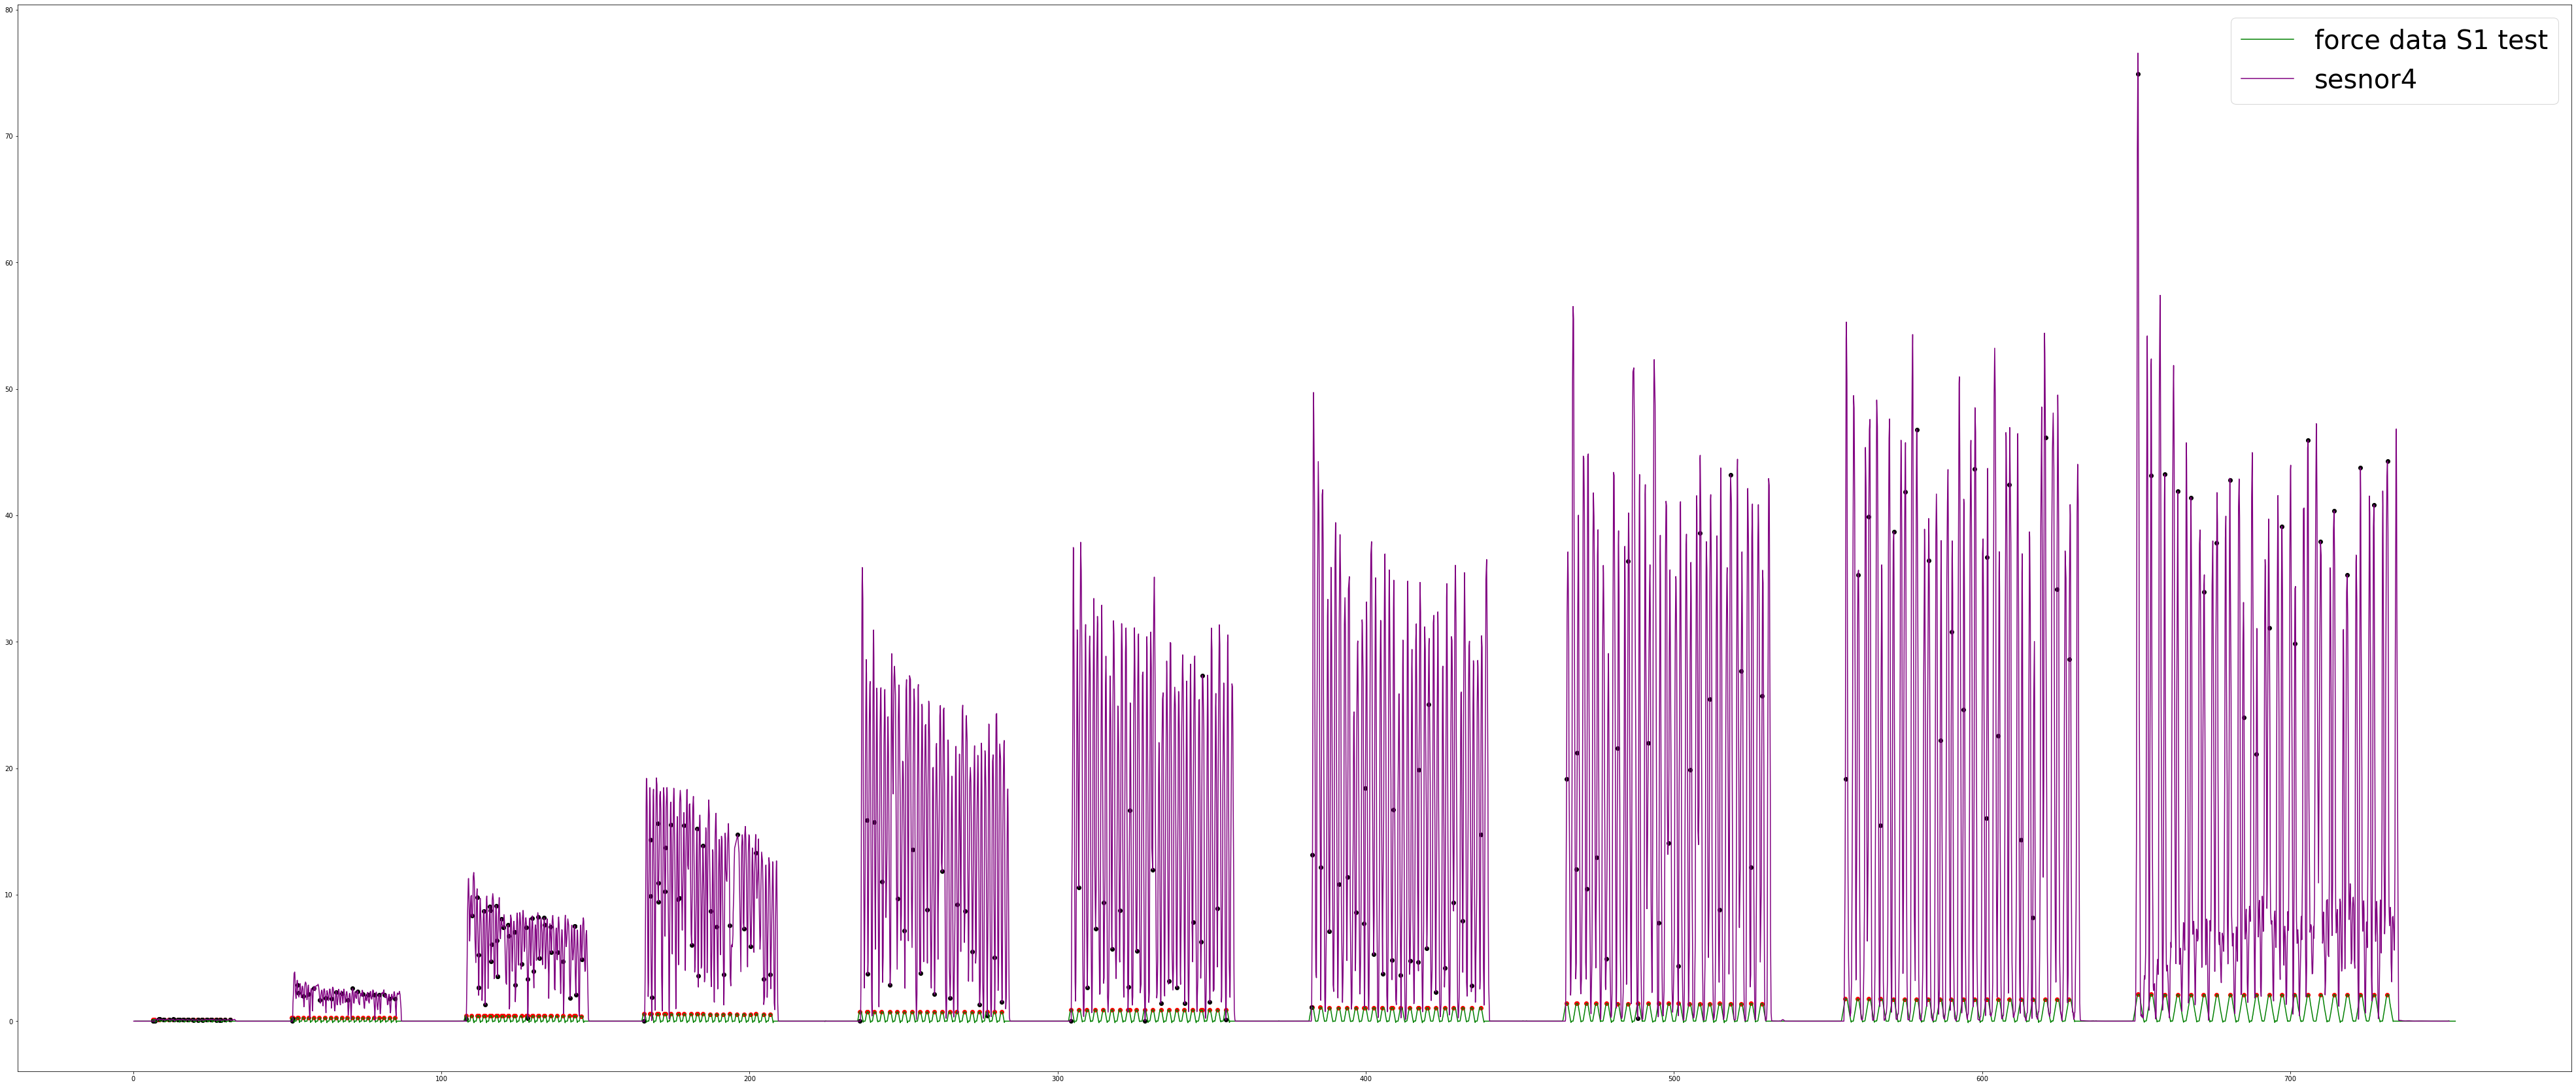

In [27]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - S1

plt.figure(figsize=(70, 30))

# plt.plot(S1["Unnamed: 0"],S1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(S1["Unnamed: 0"],S1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(S1["Unnamed: 0"],S1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(S1["Unnamed: 0"],S1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_S1 = x_force_S1 + 0.5
scaled_S1 = S1["Unnamed: 0"]

plt.plot(scaled_x_force_S1,Load_S1,color = 'green', label = 'force data S1 test' )
plt.plot(scaled_S1,S1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for S1")

#finding the peaks
pidx_Load_S1, _ = find_peaks(Load_S1,prominence= 0.1 )
peaks_Load_S1 = Load_S1[pidx_Load_S1]
peaks_Ltime_S1 = scaled_x_force_S1[pidx_Load_S1]

plt.scatter(peaks_Ltime_S1,peaks_Load_S1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_S1time = []
peaks_Ltime_S1.reset_index(drop = True, inplace = True)
peaks_Load_S1.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_S1)):
    idx_S1time.append(bisect.bisect_left(S1["Unnamed: 0"], peaks_Ltime_S1[i]))

plt.scatter(S1["Unnamed: 0"][idx_S1time],S1["s4_d"][idx_S1time],color = 'black')

In [28]:
#Storing the peaks into csv file - S1
Load_S1peaks =[]

for i in range(len(peaks_Load_S1)):
    Load_S1peaks.append(peaks_Load_S1[i])
    
content_S1 = {'R1':S1["s1_d"][idx_S1time],
              'R2':S1["s2_d"][idx_S1time],
              'R3':S1["s3_d"][idx_S1time],
              'R4':S1["s4_d"][idx_S1time], 
              'Load': Load_S1peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_S1 = pd.DataFrame(content_S1, columns = ['R1','R2','R3','R4','Load'])

df_S1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\S1.csv',index = False, header = True)

Sensor 4 is more profound for S2


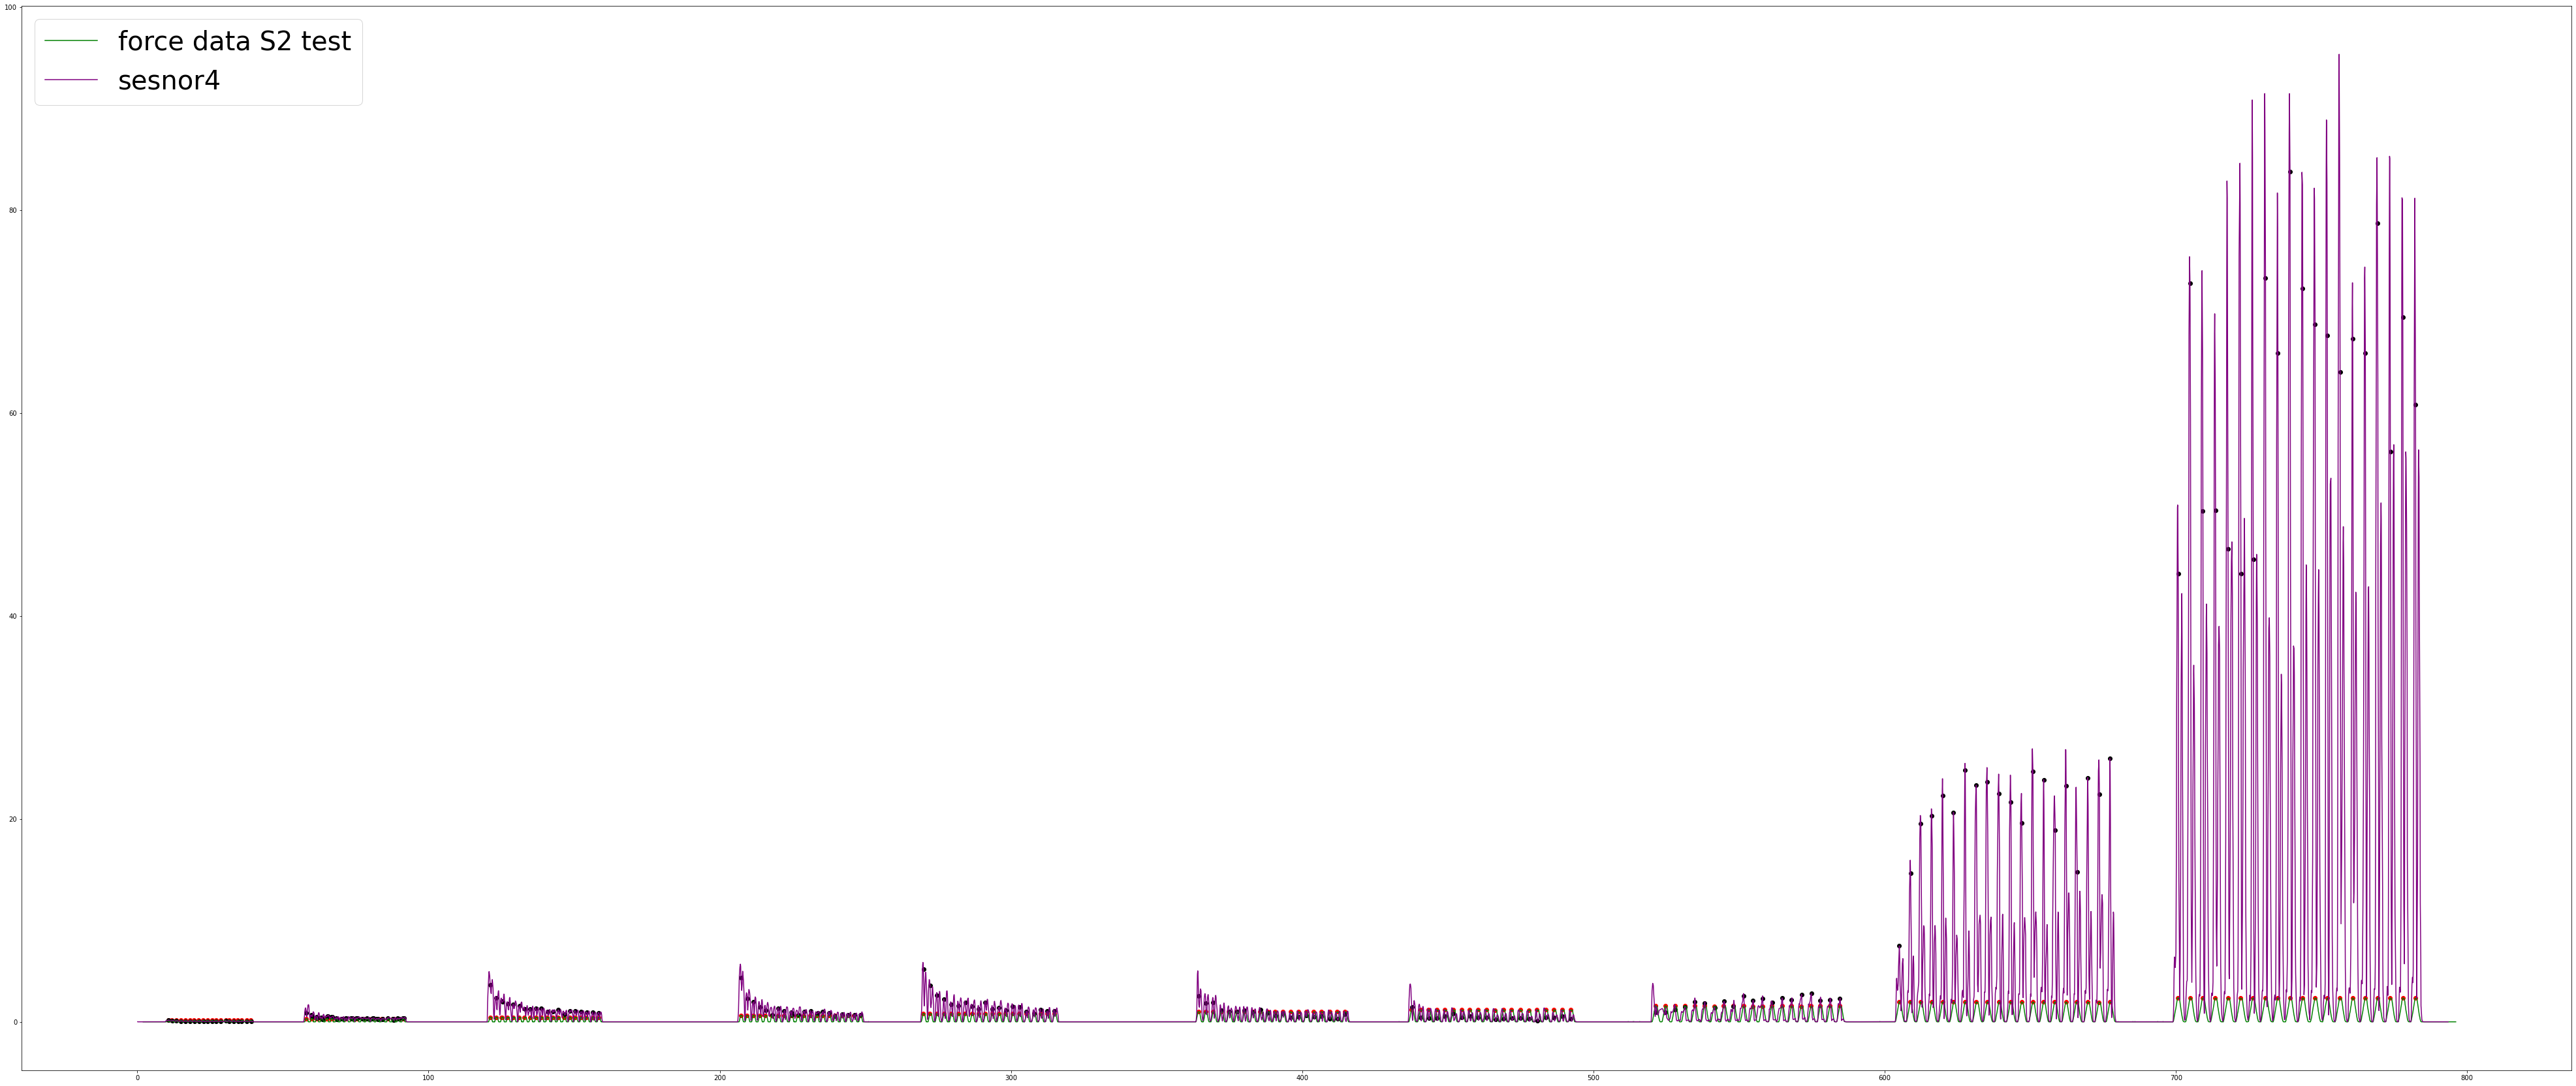

In [32]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - S2

plt.figure(figsize=(70, 30))

# plt.plot(S2["Unnamed: 0"],S2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(S2["Unnamed: 0"],S2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(S2["Unnamed: 0"],S2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(S2["Unnamed: 0"],S2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_S2 = x_force_S2 + 2
scaled_S2 = S2["Unnamed: 0"]

plt.plot(scaled_x_force_S2,Load_S2,color = 'green', label = 'force data S2 test' )
plt.plot(scaled_S2,S2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for S2")

#finding the peaks
pidx_Load_S2, _ = find_peaks(Load_S2,prominence= 0.1 )
peaks_Load_S2 = Load_S2[pidx_Load_S2]
peaks_Ltime_S2 = scaled_x_force_S2[pidx_Load_S2]

plt.scatter(peaks_Ltime_S2,peaks_Load_S2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_S2time = []
peaks_Ltime_S2.reset_index(drop = True, inplace = True)
peaks_Load_S2.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_S2)):
    idx_S2time.append(bisect.bisect_left(S2["Unnamed: 0"], peaks_Ltime_S2[i]))

plt.scatter(S2["Unnamed: 0"][idx_S2time],S2["s4_d"][idx_S2time],color = 'black')


In [33]:
#Storing the peaks into csv file - S2
Load_S2peaks =[]

for i in range(len(peaks_Load_S2)):
    Load_S2peaks.append(peaks_Load_S2[i])
    
content_S2 = {'R1':S2["s1_d"][idx_S2time],
              'R2':S2["s2_d"][idx_S2time],
              'R3':S2["s3_d"][idx_S2time],
              'R4':S2["s4_d"][idx_S2time], 
              'Load': Load_S2peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_S2 = pd.DataFrame(content_S2, columns = ['R1','R2','R3','R4','Load'])

df_S2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\S2.csv',index = False, header = True)

Sensor 2 is more profound for S3


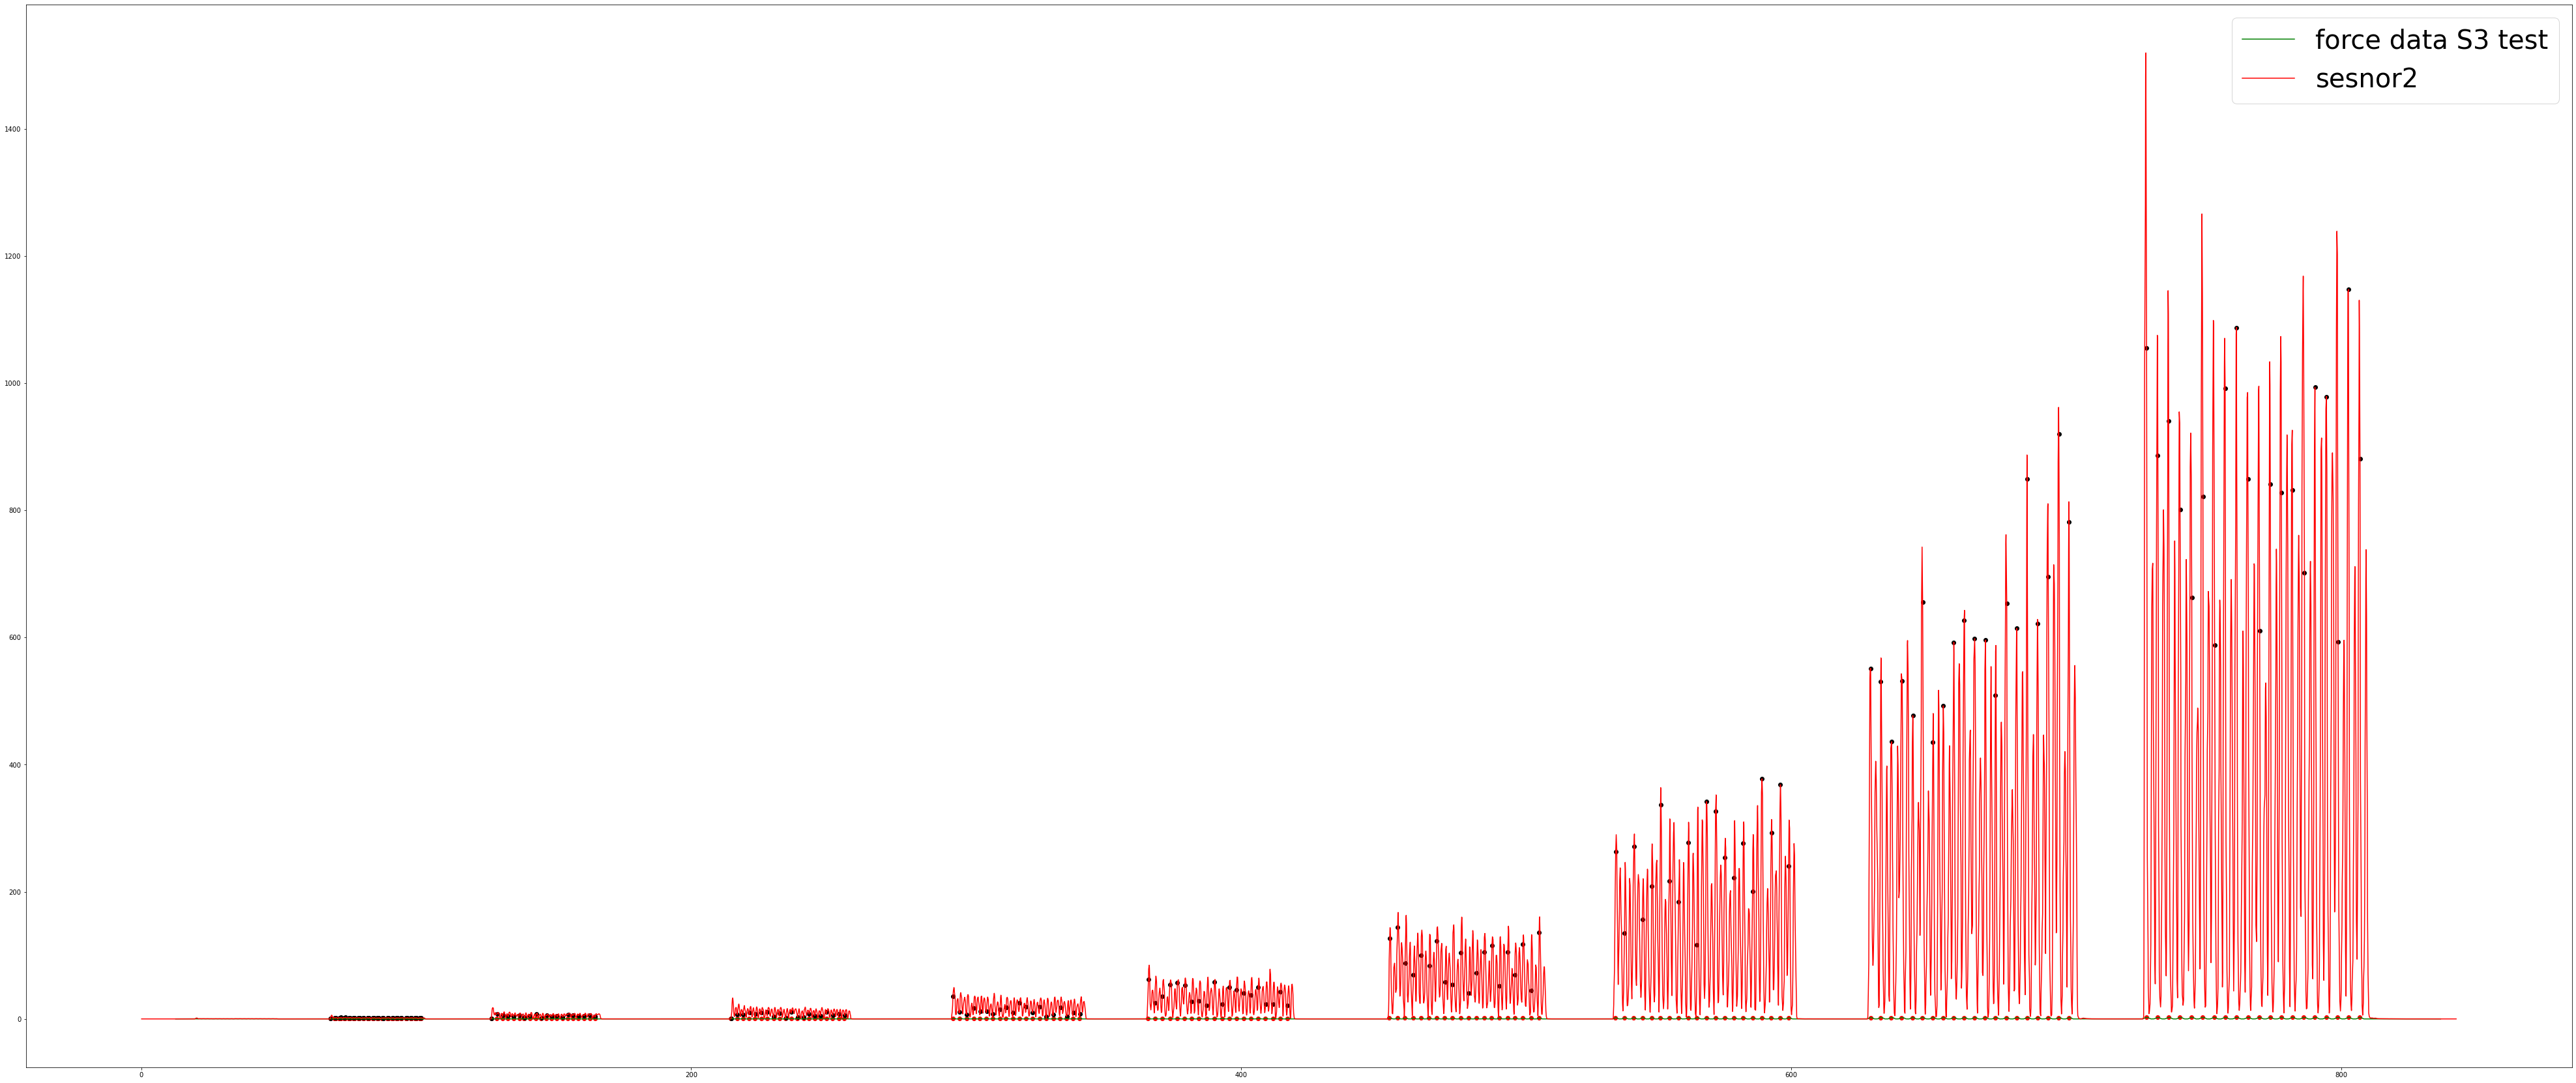

In [48]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - S3

plt.figure(figsize=(70, 30))

# plt.plot(S3["Unnamed: 0"],S3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(S3["Unnamed: 0"],S3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(S3["Unnamed: 0"],S3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(S3["Unnamed: 0"],S3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_S3 = x_force_S3 + 12.5
scaled_S3 = S3["Unnamed: 0"]

plt.plot(scaled_x_force_S3,Load_S3,color = 'green', label = 'force data S3 test' )
plt.plot(scaled_S3,S3["s2_d"], color = 'red', label = 'sesnor2')

plt.legend(fontsize=40)


print("Sensor 2 is more profound for S3")

#finding the peaks
pidx_Load_S3, _ = find_peaks(Load_S3,prominence= 0.22 )
peaks_Load_S3 = Load_S3[pidx_Load_S3]
peaks_Ltime_S3 = scaled_x_force_S3[pidx_Load_S3]

plt.scatter(peaks_Ltime_S3,peaks_Load_S3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_S3time = []
peaks_Ltime_S3.reset_index(drop = True, inplace = True)
peaks_Load_S3.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_S3)):
    idx_S3time.append(bisect.bisect_left(S3["Unnamed: 0"], peaks_Ltime_S3[i]))

plt.scatter(S3["Unnamed: 0"][idx_S3time],S3["s2_d"][idx_S3time],color = 'black')

In [49]:
#Storing the peaks into csv file - S3
Load_S3peaks =[]

for i in range(len(peaks_Load_S3)):
    Load_S3peaks.append(peaks_Load_S3[i])
    
content_S3 = {'R1':S3["s1_d"][idx_S3time],
              'R2':S3["s2_d"][idx_S3time],
              'R3':S3["s3_d"][idx_S3time],
              'R4':S3["s4_d"][idx_S3time], 
              'Load': Load_S3peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_S3 = pd.DataFrame(content_S3, columns = ['R1','R2','R3','R4','Load'])

df_S3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\S3.csv',index = False, header = True)